In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Loading the datasets

#### Column names:
#### STS-Test Dataset
  
*   0 - polarity of tweet [0 = negative, 2 = neutral, 4 = positive]
*   1- id of tweet
*   2 - date
*   3 - the query(lyx).If there is no   query, then this value is NO_QUERY
*   4 - the user that tweeted
*   5 - the text of the tweet




  
  
  
   

In [ ]:
sts_train = pd.read_csv('/content/drive/MyDrive/AI/STS-Test-train.csv',encoding="ISO-8859-1",header=None,names=['Polarity','ID','Date','Query','User','Tweet'])
sts_train.head()

,Polarity,ID,Date,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
sts_test = pd.read_csv('/content/drive/MyDrive/AI/STS-Test-test.csv',encoding="ISO-8859-1",header=None,names=['Polarity','ID','Date','Query','User','Tweet'])
sts_test.head()

,Polarity,ID,Date,Query,User,Tweet
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


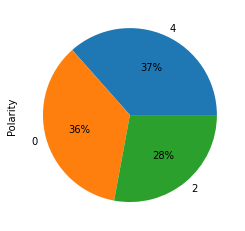

In [ ]:
sts_test.Polarity.value_counts().plot(kind='pie', autopct='%1.0f%%')

## Pre-Processing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import string
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
sts_tweet_list = sts_test['Tweet']
sts_tweet_list.drop_duplicates(inplace=True)
print(len(sts_tweet_list), 'original = ',len(sts_test['Tweet']))
sts_tweet = pd.DataFrame(sts_tweet_list)
sts_tweet['text'] = sts_tweet_list
sts_tweet.head()

498 original =  498


,Tweet,text
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,Reading my kindle2... Love it... Lee childs i...,Reading my kindle2... Love it... Lee childs i...
2,"Ok, first assesment of the #kindle2 ...it fuck...","Ok, first assesment of the #kindle2 ...it fuck..."
3,@kenburbary You'll love your Kindle2. I've had...,@kenburbary You'll love your Kindle2. I've had...
4,@mikefish Fair enough. But i have the Kindle2...,@mikefish Fair enough. But i have the Kindle2...


### Method 1 - Replacing negations 

In [ ]:
replacement_patterns = [(r'won\'t', 'will not'),(r'can\'t', 'cannot'),(r'isn\'t', 'is not'),(r'ain\'t', 'is not'),(r'(\w+)\'ll', '\g<1> will'),(r'(\w+)n\'t', '\g<1> not'),
	(r'couldn\'t', 'could not'),(r'weren\'t', 'were not'),(r'aren\'t', 'are not'),(r'was\'t', 'was not'),(r'(\w+)\'ve', '\g<1> have'),(r'(\w+)\'s', '\g<1> is'),(r'(\w+)\'re', '\g<1> are'),(r'(\w+)\'d', '\g<1> would'),
  (r'don\'t', 'do not'),(r'didn\'t', 'did not'),(r'shouldn\'t', 'should not'),(r'doesn\'t', 'does not'),(r'haven\'t', 'have not'),
  (r'hasn\'t', 'has not'),(r'hadn\'t', 'had not'),]

class RegexpReplacer(object):
  
  def __init__(self, patterns=replacement_patterns):
    self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
	
  def replace(self, text):
    s = text
    for (pattern, repl) in self.patterns:
      s = re.sub(pattern, repl, s)
    return s


In [ ]:
replacer = RegexpReplacer()
repl = lambda x: replacer.replace(x)
sts_tweet['text'] = sts_tweet.text.map(repl)
sts_tweet.head(10)

,Tweet,text
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,Reading my kindle2... Love it... Lee childs i...,Reading my kindle2... Love it... Lee childs i...
2,"Ok, first assesment of the #kindle2 ...it fuck...","Ok, first assesment of the #kindle2 ...it fuck..."
3,@kenburbary You'll love your Kindle2. I've had...,@kenburbary You will love your Kindle2. I have...
4,@mikefish Fair enough. But i have the Kindle2...,@mikefish Fair enough. But i have the Kindle2...
5,@richardebaker no. it is too big. I'm quite ha...,@richardebaker no. it is too big. I'm quite ha...
6,Fuck this economy. I hate aig and their non lo...,Fuck this economy. I hate aig and their non lo...
7,Jquery is my new best friend.,Jquery is my new best friend.
8,Loves twitter,Loves twitter
9,how can you not love Obama? he makes jokes abo...,how can you not love Obama? he makes jokes abo...


In [ ]:
punc = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x)
sts_tweet['text'] = sts_tweet.text.map(punc)
sts_tweet['text'] = sts_tweet.text.str.lower()
sts_tweet.head(10)

,Tweet,text
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i loooooooovvvvvveee my kindle2 not that th...
1,Reading my kindle2... Love it... Lee childs i...,reading my kindle2 love it lee childs i...
2,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment of the kindle2 it fuck...
3,@kenburbary You'll love your Kindle2. I've had...,you will love your kindle2 i have had mine ...
4,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle2 and i t...
5,@richardebaker no. it is too big. I'm quite ha...,no it is too big i m quite happy with the ...
6,Fuck this economy. I hate aig and their non lo...,fuck this economy i hate aig and their non lo...
7,Jquery is my new best friend.,jquery is my new best friend
8,Loves twitter,loves twitter
9,how can you not love Obama? he makes jokes abo...,how can you not love obama he makes jokes abo...


### Method 2 - URL Preprocessing

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p

p.set_options(p.OPT.URL)
nourl_list = []

for atweet in list(sts_tweet['text']):
  t = p.clean(atweet)
  nourl_list.append(t)
sts_tweet['text'] = nourl_list

sts_tweet.head(10)

,Tweet,text
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i loooooooovvvvvveee my kindle2 not that the d...
1,Reading my kindle2... Love it... Lee childs i...,reading my kindle2 love it lee childs is good ...
2,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment of the kindle2 it fucking r...
3,@kenburbary You'll love your Kindle2. I've had...,you will love your kindle2 i have had mine for...
4,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle2 and i think...
5,@richardebaker no. it is too big. I'm quite ha...,no it is too big i m quite happy with the kindle2
6,Fuck this economy. I hate aig and their non lo...,fuck this economy i hate aig and their non loa...
7,Jquery is my new best friend.,jquery is my new best friend
8,Loves twitter,loves twitter
9,how can you not love Obama? he makes jokes abo...,how can you not love obama he makes jokes abou...


### Method 4 - Removing numbers

In [ ]:
remove_number = lambda x:''.join([i for i in x if not i.isdigit()])
sts_tweet['text'] = sts_tweet.text.map(remove_number)
sts_tweet.head(10)

,Tweet,text
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i loooooooovvvvvveee my kindle not that the dx...
1,Reading my kindle2... Love it... Lee childs i...,reading my kindle love it lee childs is good read
2,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment of the kindle it fucking rocks
3,@kenburbary You'll love your Kindle2. I've had...,you will love your kindle i have had mine for ...
4,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle and i think ...
5,@richardebaker no. it is too big. I'm quite ha...,no it is too big i m quite happy with the kindle
6,Fuck this economy. I hate aig and their non lo...,fuck this economy i hate aig and their non loa...
7,Jquery is my new best friend.,jquery is my new best friend
8,Loves twitter,loves twitter
9,how can you not love Obama? he makes jokes abo...,how can you not love obama he makes jokes abou...


### Method 5 - Removing Stopwords 

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

sts_tweet['text'] = sts_tweet['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
sts_tweet.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet,text
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,loooooooovvvvvveee kindle dx cool fantastic right
1,Reading my kindle2... Love it... Lee childs i...,reading kindle love lee childs good read
2,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment kindle fucking rocks
3,@kenburbary You'll love your Kindle2. I've had...,love kindle mine months never looked back new ...
4,@mikefish Fair enough. But i have the Kindle2...,fair enough kindle think perfect
5,@richardebaker no. it is too big. I'm quite ha...,big quite happy kindle
6,Fuck this economy. I hate aig and their non lo...,fuck economy hate aig non loan given asses
7,Jquery is my new best friend.,jquery new best friend
8,Loves twitter,loves twitter
9,how can you not love Obama? he makes jokes abo...,love obama makes jokes


### Method 6 - Expanding acronyms 

In [ ]:
import csv
filename = "/content/drive/MyDrive/AI/Slang.txt"
access = "r"

def convert_acronym(text):
  string = text.split(" ")
  j = 0
  for s in string:
    with open(filename,access) as f:
      data = csv.reader(f,delimiter = "=")
      s = re.sub('[^a-zA-Z0-9-_.]'," ",s)
      for row in data:
        if s.upper() == row[0]:
          string[j] = row[1]
      f.close()
    j = j+1
  return ' '.join(string)

In [ ]:
acr = lambda x:convert_acronym(x)
sts_tweet['text'] = sts_tweet.text.map(acr)
sts_tweet.head(10)

,Tweet,text
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,loooooooovvvvvveee kindle dx cool fantastic right
1,Reading my kindle2... Love it... Lee childs i...,reading kindle love lee childs good read
2,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment kindle fucking rocks
3,@kenburbary You'll love your Kindle2. I've had...,love kindle mine months never looked back new ...
4,@mikefish Fair enough. But i have the Kindle2...,fair enough kindle think perfect
5,@richardebaker no. it is too big. I'm quite ha...,big quite happy kindle
6,Fuck this economy. I hate aig and their non lo...,fuck economy hate aig non loan given asses
7,Jquery is my new best friend.,jquery new best friend
8,Loves twitter,loves twitter
9,how can you not love Obama? he makes jokes abo...,love obama makes jokes


#### Tokenization

In [ ]:
from nltk.stem import WordNetLemmatizer
sts_tweet['processed_tweets'] = sts_tweet['text'].apply(lambda x:word_tokenize(x))

#### Lemmetizing

In [ ]:
def lemmatizing(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

sts_tweet['processed_tweets'] = sts_tweet['processed_tweets'].apply(lambda x: lemmatizing(x))

def final_text(words):
     return ' '.join(words)

sts_tweet['processed_tweets'] = sts_tweet['processed_tweets'].apply(lambda x:final_text(x))
sts_tweet.head()

,Tweet,text,processed_tweets
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,loooooooovvvvvveee kindle dx cool fantastic right,loooooooovvvvvveee kindle dx cool fantastic right
1,Reading my kindle2... Love it... Lee childs i...,reading kindle love lee childs good read,reading kindle love lee child good read
2,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment kindle fucking rocks,ok first assesment kindle fucking rock
3,@kenburbary You'll love your Kindle2. I've had...,love kindle mine months never looked back new ...,love kindle mine month never looked back new b...
4,@mikefish Fair enough. But i have the Kindle2...,fair enough kindle think perfect,fair enough kindle think perfect


#### Prior Polarity

In [ ]:
sts_tweet['Polarity'] = sts_test['Polarity']
sts_tweet.head()

,Tweet,text,processed_tweets,Polarity
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,loooooooovvvvvveee kindle dx cool fantastic right,loooooooovvvvvveee kindle dx cool fantastic right,4
1,Reading my kindle2... Love it... Lee childs i...,reading kindle love lee childs good read,reading kindle love lee child good read,4
2,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment kindle fucking rocks,ok first assesment kindle fucking rock,4
3,@kenburbary You'll love your Kindle2. I've had...,love kindle mine months never looked back new ...,love kindle mine month never looked back new b...,4
4,@mikefish Fair enough. But i have the Kindle2...,fair enough kindle think perfect,fair enough kindle think perfect,4


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

vadar = SentimentIntensityAnalyzer()
sts_tweet[['Negative','Neutral','Positive','Compound']] = sts_tweet['processed_tweets'].apply(vadar.polarity_scores).apply(pd.Series)
sts_tweet.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Tweet,text,processed_tweets,Polarity,Negative,Neutral,Positive,Compound
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,loooooooovvvvvveee kindle dx cool fantastic right,loooooooovvvvvveee kindle dx cool fantastic right,4,0.310,0.233,0.457,0.2263
1,Reading my kindle2... Love it... Lee childs i...,reading kindle love lee childs good read,reading kindle love lee child good read,4,0.000,0.413,0.587,0.7964
2,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment kindle fucking rocks,ok first assesment kindle fucking rock,4,0.000,0.694,0.306,0.2960
3,@kenburbary You'll love your Kindle2. I've had...,love kindle mine months never looked back new ...,love kindle mine month never looked back new b...,4,0.113,0.538,0.349,0.6597
4,@mikefish Fair enough. But i have the Kindle2...,fair enough kindle think perfect,fair enough kindle think perfect,4,0.000,0.333,0.667,0.7184


#### Predicting values

In [ ]:
sts_tweet['vader_polarity'] = pd.cut(sts_tweet['Compound'],bins=3,labels=[0,2,4])
sts_tweet.head(10)

,Tweet,text,processed_tweets,Polarity,Negative,Neutral,Positive,Compound,vader_polarity
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,loooooooovvvvvveee kindle dx cool fantastic right,loooooooovvvvvveee kindle dx cool fantastic right,4,0.310,0.233,0.457,0.2263,2
1,Reading my kindle2... Love it... Lee childs i...,reading kindle love lee childs good read,reading kindle love lee child good read,4,0.000,0.413,0.587,0.7964,4
2,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment kindle fucking rocks,ok first assesment kindle fucking rock,4,0.000,0.694,0.306,0.2960,2
3,@kenburbary You'll love your Kindle2. I've had...,love kindle mine months never looked back new ...,love kindle mine month never looked back new b...,4,0.113,0.538,0.349,0.6597,4
4,@mikefish Fair enough. But i have the Kindle2...,fair enough kindle think perfect,fair enough kindle think perfect,4,0.000,0.333,0.667,0.7184,4
5,@richardebaker no. it is too big. I'm quite ha...,big quite happy kindle,big quite happy kindle,4,0.000,0.429,0.571,0.6115,4
6,Fuck this economy. I hate aig and their non lo...,fuck economy hate aig non loan given asses,fuck economy hate aig non loan given ass,0,0.682,0.318,0.000,-0.8934,0
7,Jquery is my new best friend.,jquery new best friend,jquery new best friend,4,0.000,0.213,0.787,0.8126,4
8,Loves twitter,loves twitter,love twitter,4,0.000,0.192,0.808,0.6369,4
9,how can you not love Obama? he makes jokes abo...,love obama makes jokes,love obama make joke,4,0.000,0.238,0.762,0.7506,4


              precision    recall  f1-score   support

    Negative       0.90      0.52      0.66       177
     Neutral       0.51      0.78      0.62       139
    Positive       0.70      0.71      0.71       182

    accuracy                           0.66       498
   macro avg       0.71      0.67      0.66       498
weighted avg       0.72      0.66      0.67       498



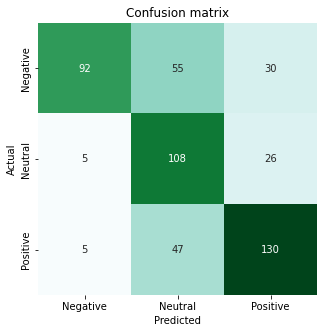

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(sts_tweet['Polarity'],sts_tweet['vader_polarity'],target_names=['Negative','Neutral','Positive']))

def plot_cm(y_test, y_pred, target_names=['Negative','Neutral','Positive'],figsize=(5,5)):
  cm = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=figsize)
  sns.heatmap(cm, annot=True, fmt='g', cmap='BuGn', cbar=False,ax=ax)
  ax.set_title('Confusion matrix')
  ax.set_xlabel('Predicted')
  ax.set_xticklabels(target_names)
  ax.set_ylabel('Actual')
  ax.set_yticklabels(target_names,fontdict={'verticalalignment': 'center'});

plot_cm(sts_tweet['Polarity'], sts_tweet['vader_polarity'])

### 3 way N-grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

cv = CountVectorizer(ngram_range=(1,2))

corpus = sts_tweet['processed_tweets'].to_list()
X = cv.fit_transform(corpus)
final_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
print(final_df.shape)

final_df.head()

(498, 4854)


,aapl,aapl spy,abortion,abortion zealot,absolutely,absolutely blow,absolutely hilarious,access,access damn,access throttle,accident,accident guess,accident location,according,according create,accosts,accosts roger,account,account request,acg,acg custom,aching,acia,acia pill,across,across county,actually,actually quite,ad,ad adobe,ad lebron,adam,adam lambert,add,add people,addiction,addiction thank,addictive,adidas,adidas billups,...,yes,yes excited,yes gm,yes laughing,yes please,yes still,yes video,yesterday,yesterday cbs,yet,yet work,york,york time,you,you among,you feed,you feel,you good,you may,you said,you trick,you twippin,you verse,you wondering,youtube,youtube adobe,yr,yr old,yuan,yuan invested,yummmmmy,zealot,zealot could,zero,zero desire,zomg,zoom,zoom lebron,zydrunas,zydrunas awesome
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = sts_tweet['Polarity']

X_train, X_test, y_train, y_test=train_test_split(final_df, y, test_size=0.25)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(373, 4854) (373,) (125, 4854) (125,)


In [ ]:
####################################################  Naive Bayes #################################################################
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))    

              precision    recall  f1-score   support

           0       0.67      0.63      0.65        41
           2       0.60      0.66      0.63        41
           4       0.63      0.60      0.62        43

    accuracy                           0.63       125
   macro avg       0.63      0.63      0.63       125
weighted avg       0.63      0.63      0.63       125

Confusion matrix: 
[[26  8  7]
 [ 6 27  8]
 [ 7 10 26]]


In [ ]:
#################################################### SVM ######################################################
from sklearn import svm

svm_classifier=svm.SVC(C=100, kernel='linear', gamma=0.5)
svm_classifier.fit(X_train, y_train)

y_pred=svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.71      0.66      0.68        41
           2       0.55      0.44      0.49        41
           4       0.50      0.63      0.56        43

    accuracy                           0.58       125
   macro avg       0.59      0.58      0.58       125
weighted avg       0.58      0.58      0.58       125

Confusion matrix: 
[[27  5  9]
 [ 5 18 18]
 [ 6 10 27]]


In [ ]:
############################################### Random Forest ###########################################################
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(max_depth=30,n_estimators=4000)
rf_classifier.fit(X_train,y_train)

y_pred=rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        41
           2       0.67      0.29      0.41        41
           4       0.53      0.77      0.63        43

    accuracy                           0.62       125
   macro avg       0.64      0.61      0.59       125
weighted avg       0.64      0.62      0.59       125

Confusion matrix: 
[[32  1  8]
 [ 8 12 21]
 [ 5  5 33]]


### Binary N-gram

In [ ]:
binary_n = sts_tweet
indexNames = sts_tweet[sts_tweet['Polarity']==2].index
binary_n.drop(indexNames , inplace=True)
binary_n.head()

,Tweet,text,processed_tweets,Polarity,Negative,Neutral,Positive,Compound,vader_polarity
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,loooooooovvvvvveee kindle dx cool fantastic right,loooooooovvvvvveee kindle dx cool fantastic right,4,0.310,0.233,0.457,0.2263,2
1,Reading my kindle2... Love it... Lee childs i...,reading kindle love lee childs good read,reading kindle love lee child good read,4,0.000,0.413,0.587,0.7964,4
2,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment kindle fucking rocks,ok first assesment kindle fucking rock,4,0.000,0.694,0.306,0.2960,2
3,@kenburbary You'll love your Kindle2. I've had...,love kindle mine months never looked back new ...,love kindle mine month never looked back new b...,4,0.113,0.538,0.349,0.6597,4
4,@mikefish Fair enough. But i have the Kindle2...,fair enough kindle think perfect,fair enough kindle think perfect,4,0.000,0.333,0.667,0.7184,4


In [ ]:
corpus = binary_n['processed_tweets'].to_list()
X = cv.fit_transform(corpus)
final_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
print(final_df.shape)

final_df.head()

(359, 3765)


,abortion,abortion zealot,absolutely,absolutely blow,absolutely hilarious,access,access damn,access throttle,accident,accident guess,according,according create,aching,acia,acia pill,actually,actually quite,ad,ad adobe,adam,adam lambert,addiction,addiction thank,addictive,adidas,adidas laughing,administration,administration must,adobe,adobe goodby,adobe le,advice,advice saying,africa,africa going,afternoon,agency,agency new,ago,ago warren,...,year time,yearly,yearly tax,yeeeee,yes,yes excited,yes gm,yes laughing,yes please,yes still,yes video,yesterday,yesterday cbs,yet,yet work,york,york time,you,you among,you feed,you feel,you good,you may,you said,you trick,you twippin,you verse,you wondering,youtube,youtube adobe,yr,yr old,yummmmmy,zealot,zealot could,zero,zero desire,zomg,zydrunas,zydrunas awesome
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = binary_n['Polarity']

X_train, X_test, y_train, y_test=train_test_split(final_df, y, test_size=0.25)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(269, 3765) (269,) (90, 3765) (90,)


In [ ]:
############################################# Logistic Regression Classifier ###########################################################

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

lr_classifier=LogisticRegression()
lr_classifier.fit(X_train, y_train)

y_pred=lr_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        38
           4       0.81      0.83      0.82        52

    accuracy                           0.79        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90

Confusion matrix: 
[[28 10]
 [ 9 43]]


In [ ]:
####################################################  Naive Bayes #################################################################
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))    

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        38
           4       0.78      0.83      0.80        52

    accuracy                           0.77        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.77      0.77      0.77        90

Confusion matrix: 
[[26 12]
 [ 9 43]]


In [ ]:
#################################################### SVM ######################################################
from sklearn import svm

svm_classifier=svm.SVC(C=100, kernel='linear', gamma=0.5)
svm_classifier.fit(X_train, y_train)

y_pred=svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        38
           4       0.79      0.88      0.84        52

    accuracy                           0.80        90
   macro avg       0.80      0.78      0.79        90
weighted avg       0.80      0.80      0.80        90

Confusion matrix: 
[[26 12]
 [ 6 46]]


In [ ]:
############################################### Random Forest ###########################################################
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(max_depth=30,n_estimators=4000)
rf_classifier.fit(X_train,y_train)

y_pred=rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        38
           4       0.84      0.79      0.81        52

    accuracy                           0.79        90
   macro avg       0.78      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

Confusion matrix: 
[[30  8]
 [11 41]]
